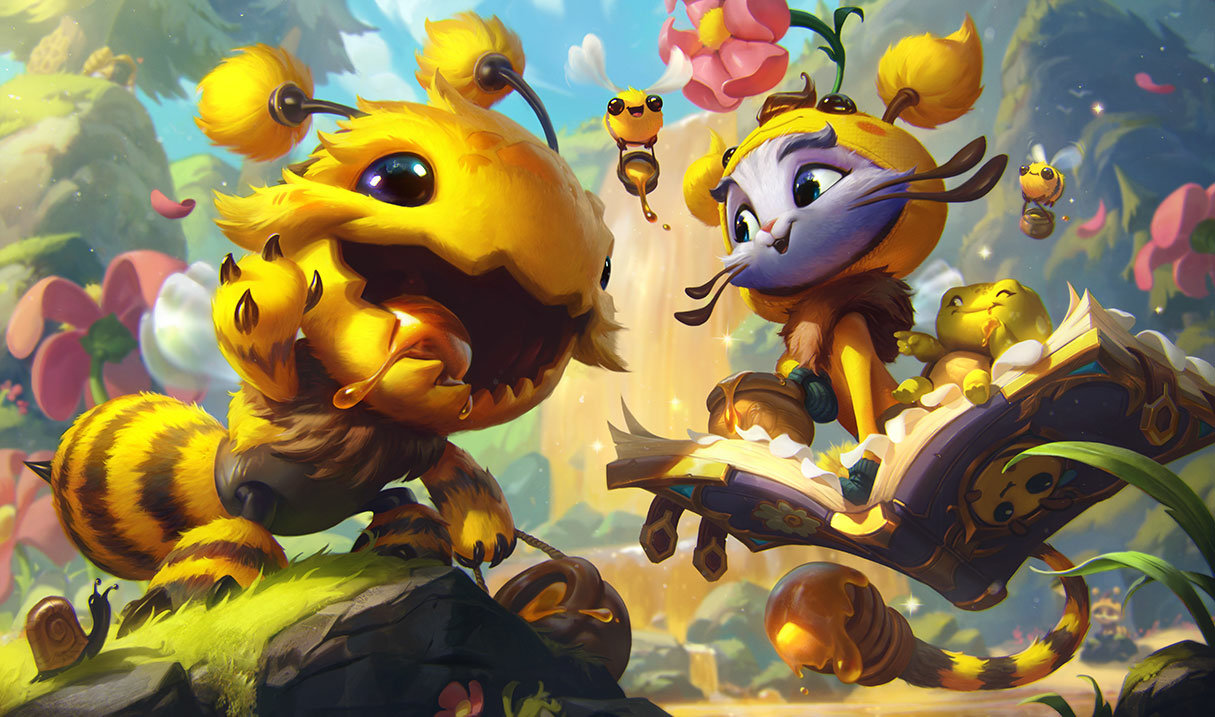

In [12]:
#importar bibliotecas
import PIL.Image
import urllib.request
import urllib.parse
import json
from collections import defaultdict
from random import randint

API = "RGAPI-97398037-68e2-4b4d-b836-a7cc4c7da7ed"
#consulta dos dados à api da RIOT
nick = urllib.parse.quote(input('Qual nick você gostaria de consultar? '), safe='')
with urllib.request.urlopen('https://br1.api.riotgames.com/lol/summoner/v4/summoners/by-name/{0}?api_key={1}'.format(nick, API)) as response:
  info = json.load(response)
with urllib.request.urlopen('https://br1.api.riotgames.com/lol/league/v4/entries/by-summoner/{0}?api_key={1}'.format(info['id'], API))  as response:
  rank = json.load(response)
with urllib.request.urlopen('https://br1.api.riotgames.com/lol/champion-mastery/v4/champion-masteries/by-summoner/{0}?api_key={1}'.format(info['id'],API))  as response:
  maest = json.load(response)
with urllib.request.urlopen('http://ddragon.leagueoflegends.com/cdn/12.5.1/data/pt_BR/champion.json')  as response:
  champt = json.load(response)
champtt = list(champt.items())
champ =list(champtt[3][1].items())
nCmp = ""
player = {
  'pid': info['id'],
  'nick': info['name'],
  'level': info['summonerLevel'],
  'fotoid': info['profileIconId'],
  'elosd': 'Unranked', 
  'ranksd': '',
  'elofl': 'Unranked', 
  'rankfl': '',
  'lpsd': '',
  'lpfl': '',
  'winsd': '',
  'losesd': '',
  'winfl': '',
  'losefl': '',
  'm1': 'Sem Dados',
  'm1l': '',
  'm2': 'Sem Dados',
  'm2l': '',
  'm3': 'Sem Dados',
  'm3l': ''
}
def nomeCampeao (id):
  numc = len(champ)
  for i in range(numc):
    champtemp = list(champ[i])
    if int(champtemp[1]['key']) == id:
      cmpFundo = champtemp[1]['id']
      return(cmpFundo)
      break
cmpFundo = nomeCampeao(maest[1]['championId'])
with urllib.request.urlopen('http://ddragon.leagueoflegends.com/cdn/12.10.1/data/en_US/champion/{0}.json'.format(cmpFundo))  as response:
  skinsi = json.load(response)
skinsinfo = skinsi['data'][cmpFundo]['skins']
skin = skinsinfo[randint(0, (len(skinsinfo))-1)]['num']
      #nCmp == champ['data'][:i]['name']
      #cmpFundo = champ['data'][:i]['id']
 # print(nCmp, "\n\n,", cmpFundo)
#maest = urllib.request.urlretrieve('https://br1.api.riotgames.com/lol/champion-mastery/v4/champion-masteries/by-summoner/${lolinfo.data.id}?api_key=${config.apiriot}')
#print(cmpFundo)
overlay = urllib.request.urlretrieve('http://ddragon.leagueoflegends.com/cdn/img/champion/splash/{0}_{1}.jpg'.format(cmpFundo, skin), "overlay")
img = PIL.Image.open("overlay")
display(img)